In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

duckdb_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.duckdb"
sqlite_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.sqlite"
parquet_dir = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1_pqds"
mza_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mza"
mzmlb_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mzMLb"
mzml_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mzML"
mzdb_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_poo_truepoopos_dda1.raw.mzDB"
mz5_file = "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mz5"
spectrum_idx = 1000
precursor_mz = 118.0865
ppm_acc = 5
fragment_mz = 59.0737
neutral_loss = 59.0128

C:\Users\willi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyopenms\__init__.py:41: UserWarning: Warning: OPENMS_DATA_PATH environment variable already exists. pyOpenMS will use it (C:\Program Files\OpenMS-3.1.0\share\OpenMS) to locate data in the OpenMS share folder (e.g., the unimod database), instead of the default (C:\Users\willi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyopenms\share/OpenMS).
  warnings.warn(


In [2]:
# turn_mzml_parquet("C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1.mzML", "C:/Users/willi/Documents/mzsql/massive_data/180205_Poo_TruePooPos_dda1_pqds")

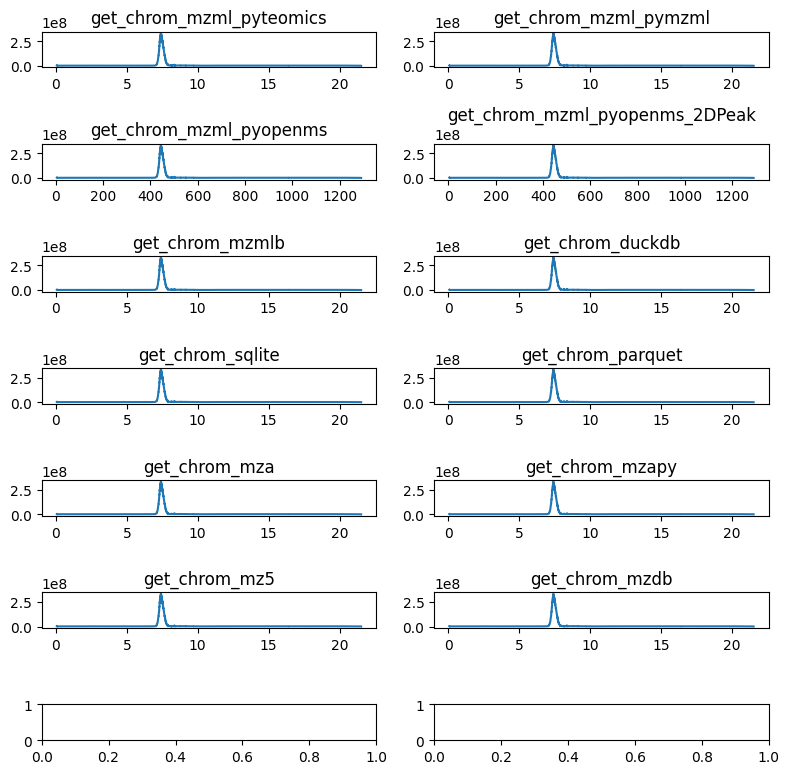

In [3]:
functions = [
    (get_chrom_mzml_pyteomics, mzml_file),
    (get_chrom_mzml_pymzml, mzml_file),
    (get_chrom_mzml_pyopenms, mzml_file),
    (get_chrom_mzml_pyopenms_2DPeak, mzml_file),
    (get_chrom_mzmlb, mzmlb_file),
    (get_chrom_duckdb, duckdb_file),
    (get_chrom_sqlite, sqlite_file),
    (get_chrom_parquet, parquet_dir),
    (get_chrom_mza, mza_file),
    (get_chrom_mzapy, mza_file),
    (get_chrom_mz5, mz5_file),
    (get_chrom_mzdb, mzdb_file)
]

fig, axs = plt.subplots(int(len(functions)/2)+1, 2, figsize=(8, 8))
axs = axs.flatten()
for i, (func, file) in enumerate(functions):
    chrom_data = func(file, precursor_mz, 10)
    axs[i].plot(chrom_data["rt"], chrom_data["int"])
    axs[i].set_title(func.__name__)
plt.tight_layout()
plt.show()